# **Customer Churn Prediction**

## 1.) Problem Description

Perusahaan Telekom menawarkan berbagai produk jaringan dan telekomunikasi. Banyaknya Perusahaan Telekom menyebabkan tingginya
tingkat persaingan antar perusahaan sehingga dibutuhkan prediksi customer churn. Customer Churn adalah keadaan dimana pelanggan memutuskan untuk berhenti berlangganan dan berpindah layanan provider (perusahaan telekom). 

## 2.) Import Data

In [4]:
#import data (upload data)
from google.colab import files
uploaded = files.upload()

Saving Data Test.csv to Data Test (2).csv


## 3.) Import Library

In [2]:
#import library yang dibutuhkan
import io
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


## 4.) Exploratory Data Analysis

In [3]:
#load data train menggunakan pandas
train = pd.read_csv(io.BytesIO(uploaded['Data Train.csv']))

In [5]:
#load data test menggunakan pandas
data_test = pd.read_csv(io.BytesIO(uploaded['Data Test.csv']))

In [6]:
#menampilkan kolom/feature, type data dari dataframe train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

> Terdapat 20 kolom data pada dataset dengan type data object, int, dan float. semua features non-null(berisi)



In [7]:
#Menampilkan 5 baris data teratas
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [8]:
#Menampilkan 5 baris data terbawah
train.tail()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4249,VT,86,area_code_415,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


In [9]:
#Menampilkan deskripsi statistik tingkat tinggi dari kolom/feature numerik pada dataset
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000




> 1.   Nilai Min dan Max relatif tidak memiliki range yang  begitu jauh sehingga tidak ada indikasi kesalahan terjadinya penginputan data 
> 2.   Nilai mean dan median(50%) yang berbeda cukup signifikan mengindikasi adanya outlier pada data





In [10]:
#menampilkan jumlah baris dan kolom data
train.shape

(4250, 20)



> Terdapat 4250 baris/data dan 20 kolom/features pada dataframe 'train'



In [11]:
#menampilkan jumlah data bernilai null dari features pada dataframe train
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64



> Tidak ada data pada features yang bernilai null(kosong)

In [12]:
categorical = ['state', 'area_code', 'international_plan','voice_mail_plan', 'churn' ]
numerical = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 
             'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 
             'total_night_charge','total_intl_minutes','total_intl_calls', 'total_intl_charge', 'number_customer_service_calls'  ]

In [13]:
#Menentukan outliers
def get_outliers(train) : 
  q3 = train.quantile(0.75)
  q1 = train.quantile(0.25)

  iqr = q3-q1

  #min outliers
  min_val = q1 - 1.5*iqr
  #max outliers
  max_val = q3 + 1.5*iqr

  outliers = train[(train < min_val) | (train>max_val)].count()
  print(outliers)

In [14]:
#Menampilkan jumlah outliers pada semua features numerical
for col in numerical:
  print(col, end=':')
  get_outliers(train[col])

account_length:20
number_vmail_messages:86
total_day_minutes:25
total_day_calls:28
total_day_charge:26
total_eve_minutes:34
total_eve_calls:24
total_eve_charge:34
total_night_minutes:37
total_night_calls:33
total_night_charge:37
total_intl_minutes:62
total_intl_calls:100
total_intl_charge:62
number_customer_service_calls:335




> Semua kolom numerik pada dataframe train memiliki outliers. outliers relatif tidak begitu banyak



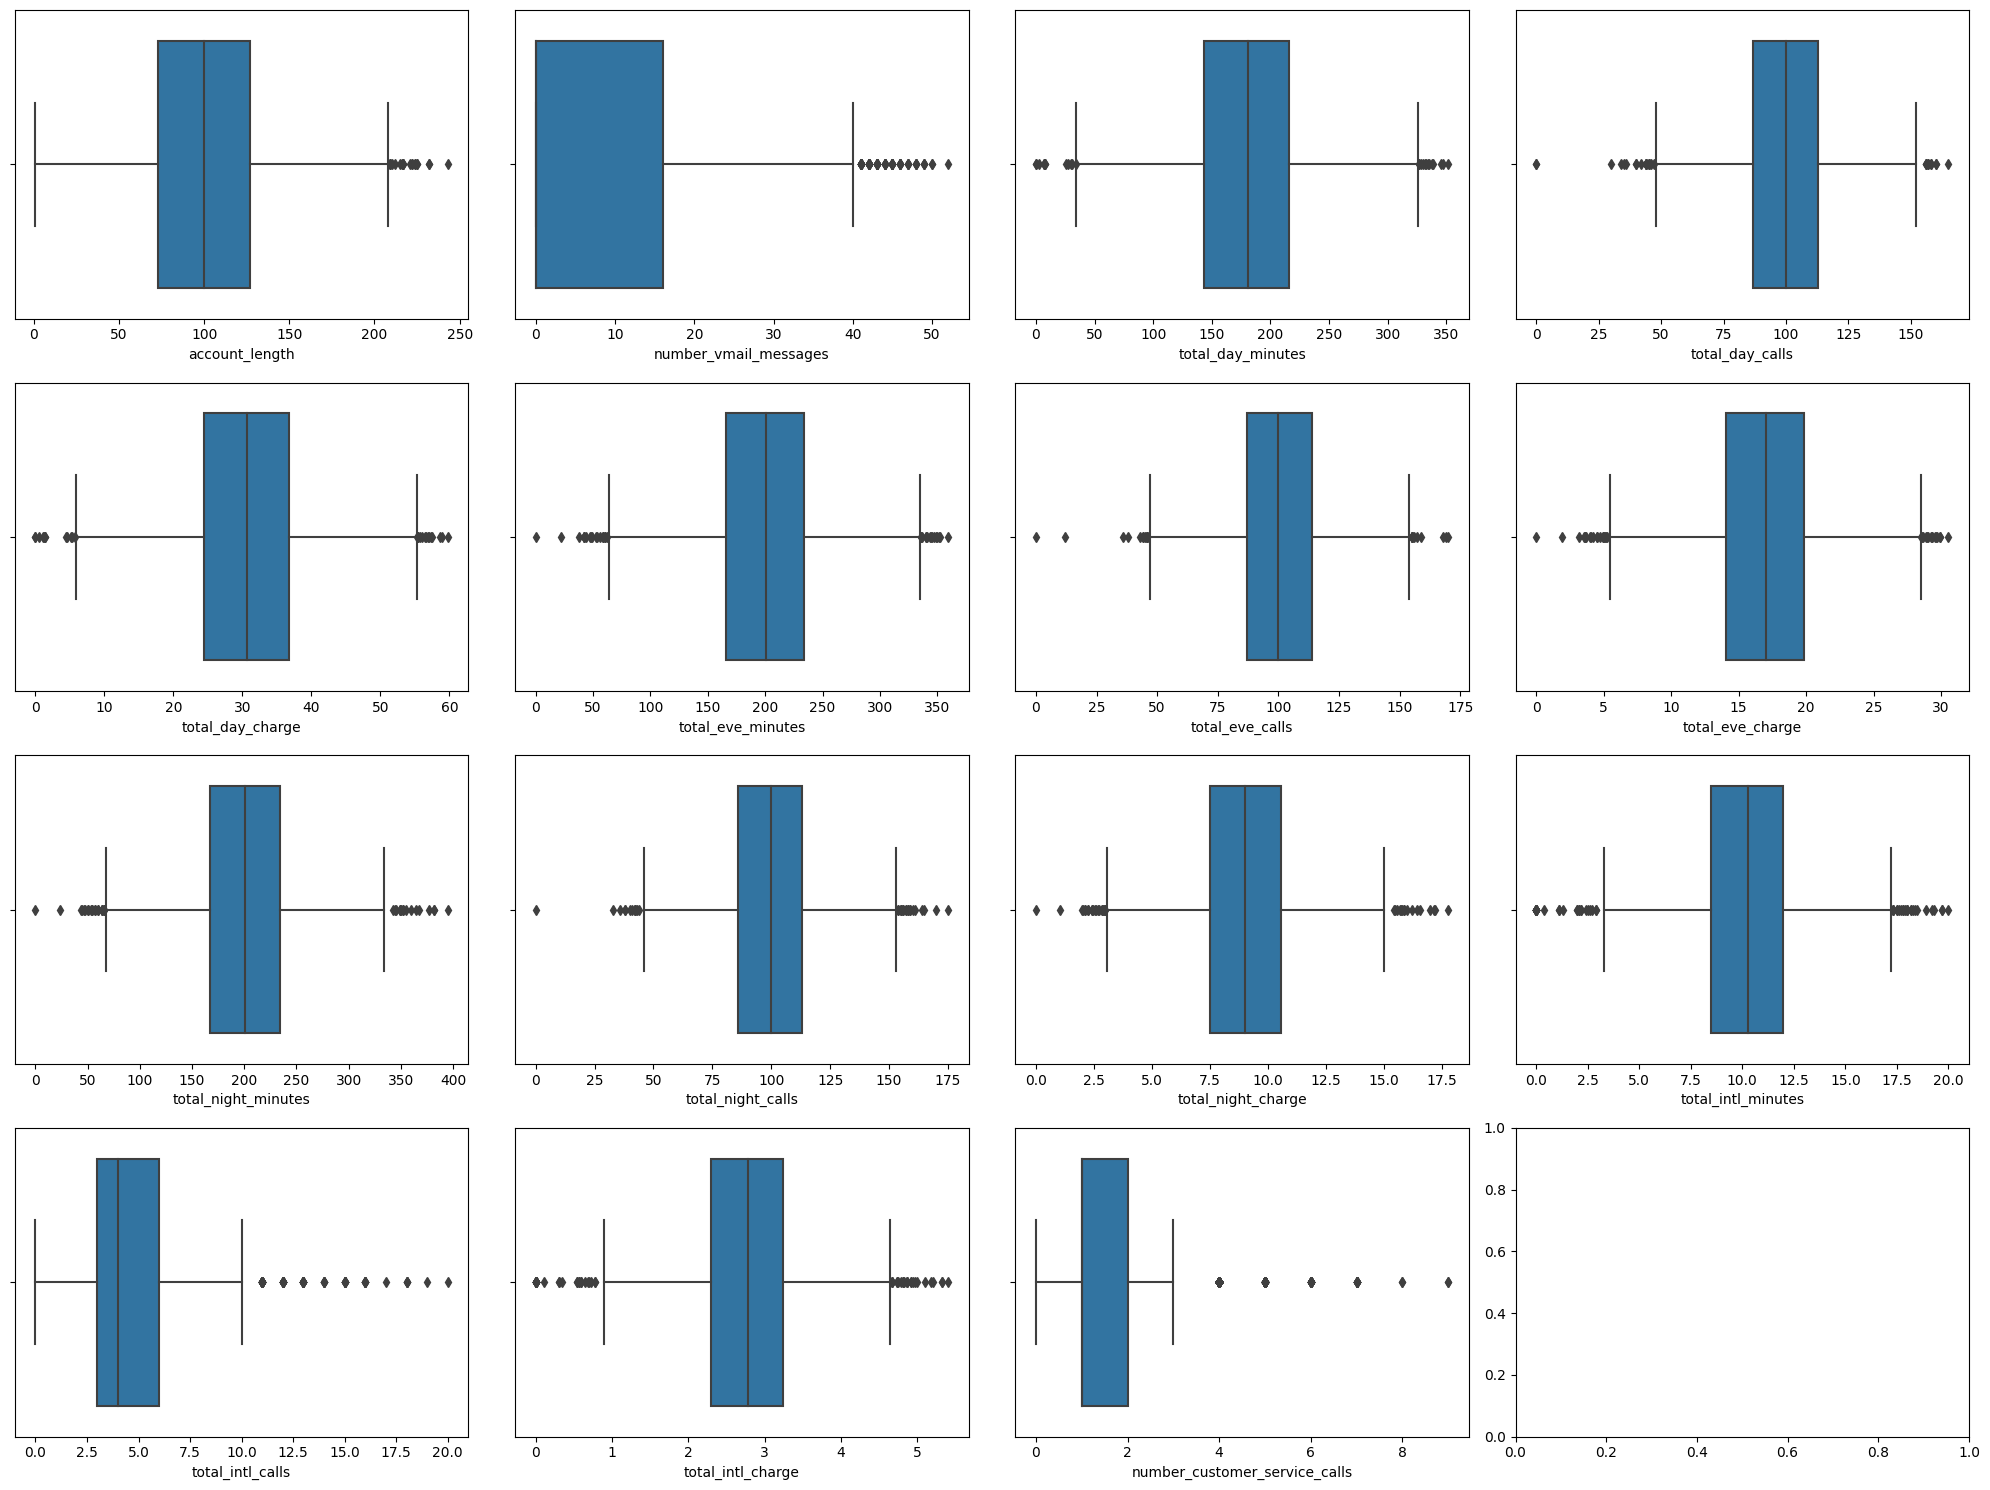

In [15]:
#manampilkan boxplot kelas numerical dataframe train
train_boxplot = train[numerical]
numerical_rows = (len(train.columns)+2)//5
fig, axes = plt.subplots(nrows=numerical_rows, ncols=4, figsize=(20,15))

for i, col in enumerate(train_boxplot.columns):
    sns.boxplot(data=train_boxplot, x=col, ax=axes[i // 4, i % 4])
plt.tight_layout()
plt.show()




> Semua kolom tipe numerik memiliki outliers



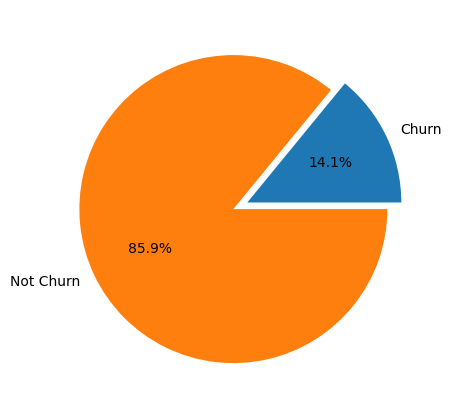

Churn:  598
Not Churn:  3652


In [17]:
#menghitung churn
churn = train[train['churn'] == 'yes']['churn'].count()

#menghitung tidak churn
not_churn = train[train['churn'] == 'no']['churn'].count()

#membuat pie chart
fig = plt.figure(figsize=(5,5))
plt.pie([churn, not_churn], labels=['Churn', 'Not Churn'], explode=(0, 0.1),  autopct="%1.1f%%", startangle=1800)
plt.show()

print('Churn: ', churn)
print('Not Churn: ', not_churn)



> 1.   sebanyak 14.1% (598 customers) yang melakukan churned dan 85.9% (3652 customers)
> 2.   Terdapat imbalance terhadap 2 jenis data yang digunakan, dimana data churned hanya sebanyak 14.1%





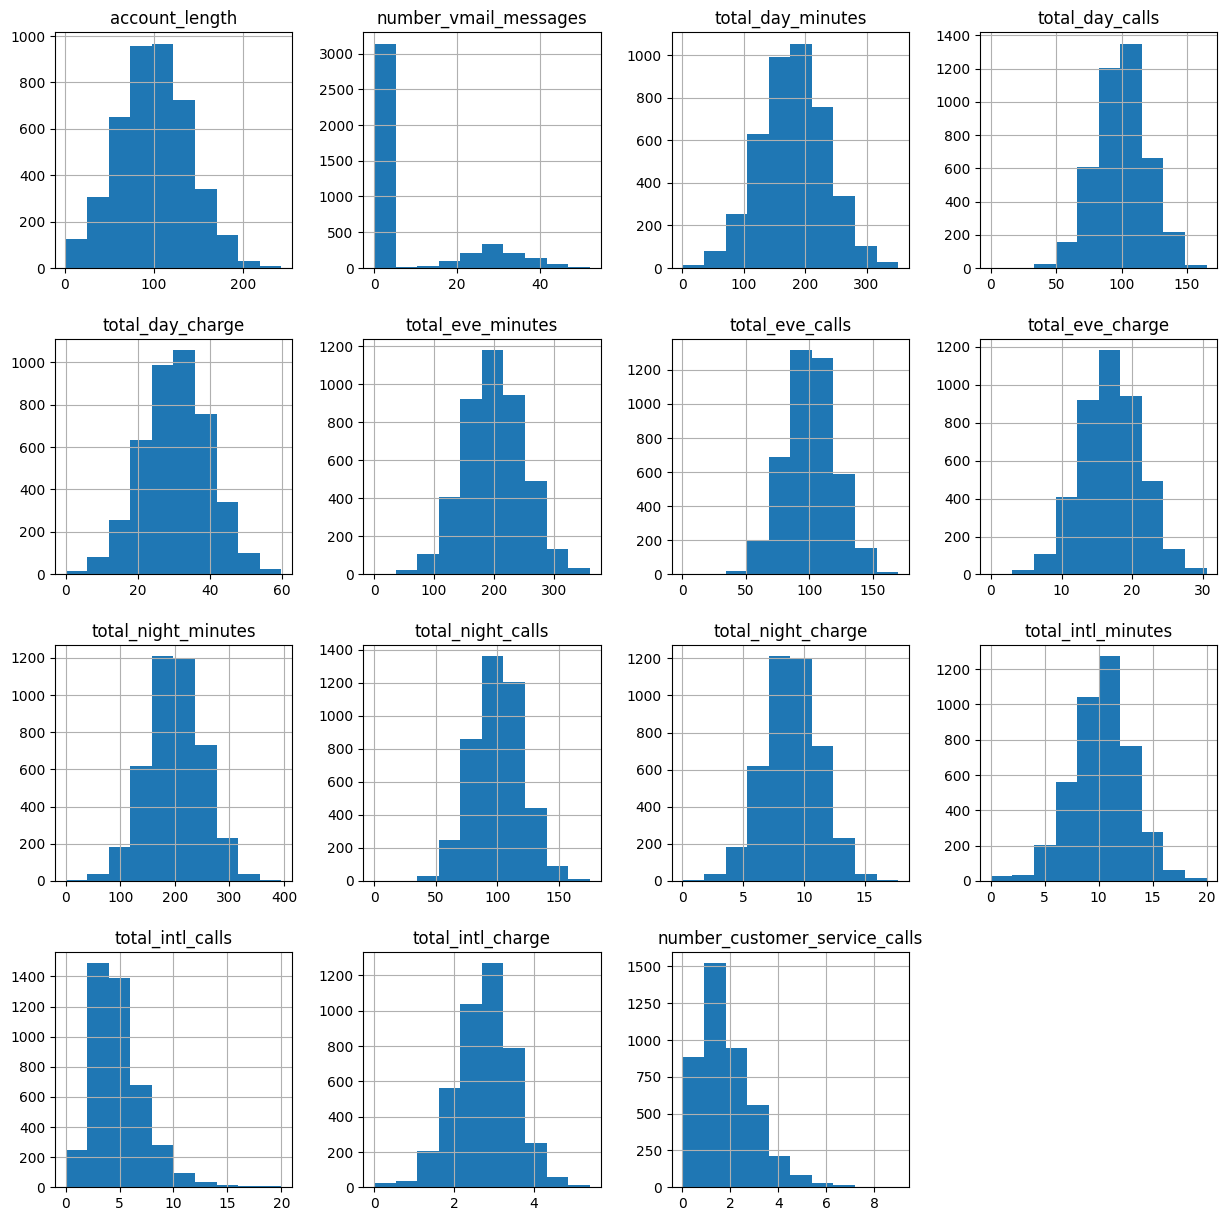

In [18]:
#menampilkan histogram untuk semua kolom numerik
plots = train.hist(figsize=(15,15))



> Semua kolom numerik terdistribusi 'tidak normal', namun tidak begitu signifikan



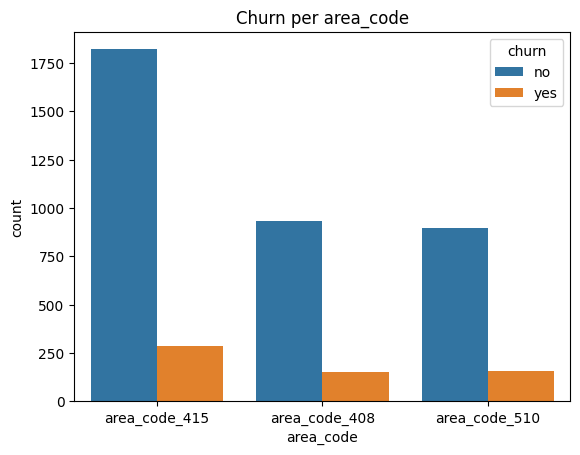

In [19]:
#Menampilkan churn berdasarkan area code
sns.countplot(x = 'area_code', data = train, hue = 'churn')
plt.title('Churn per area_code')
plt.show()



> customers yang melakukan churn paling banyak ada di area_code 415



In [20]:
def grouped_barchart(column): 
  bar = train.groupby(['area_code', column]).count()['churn'].reset_index()


  g = sns.catplot(
      data = bar, kind = "bar", 
      x = "area_code", y = "churn", hue = column, 
      palette = "dark" , height = 8
  )

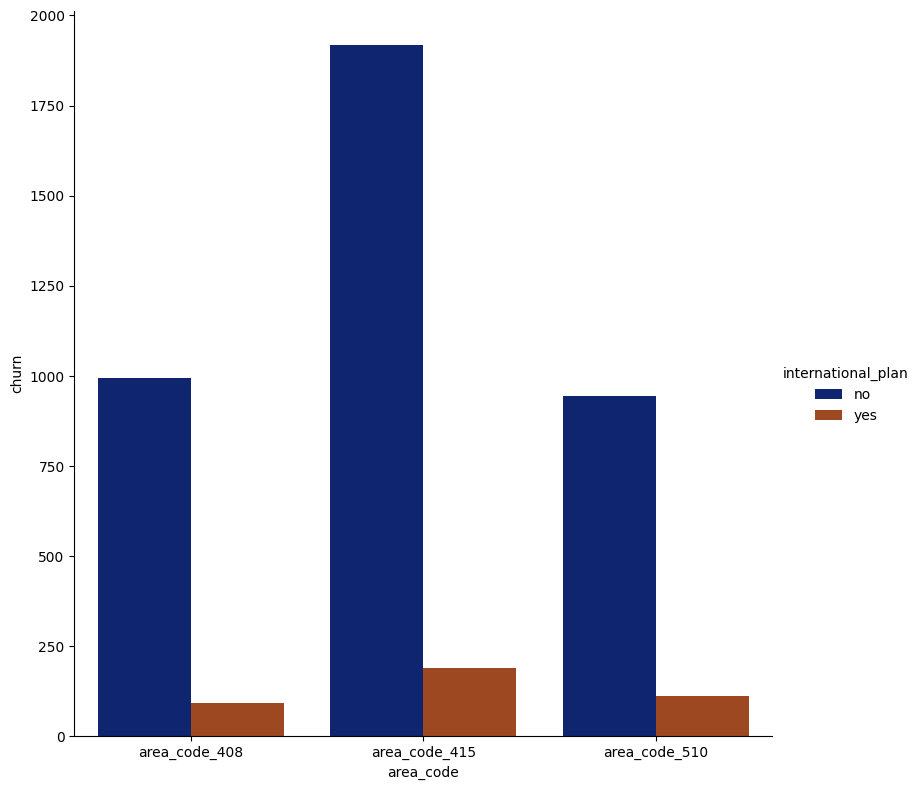

In [21]:
grouped_barchart('international_plan')



> customers dengan international plan yang melakukan churn paling banyak berada pada area_code_415




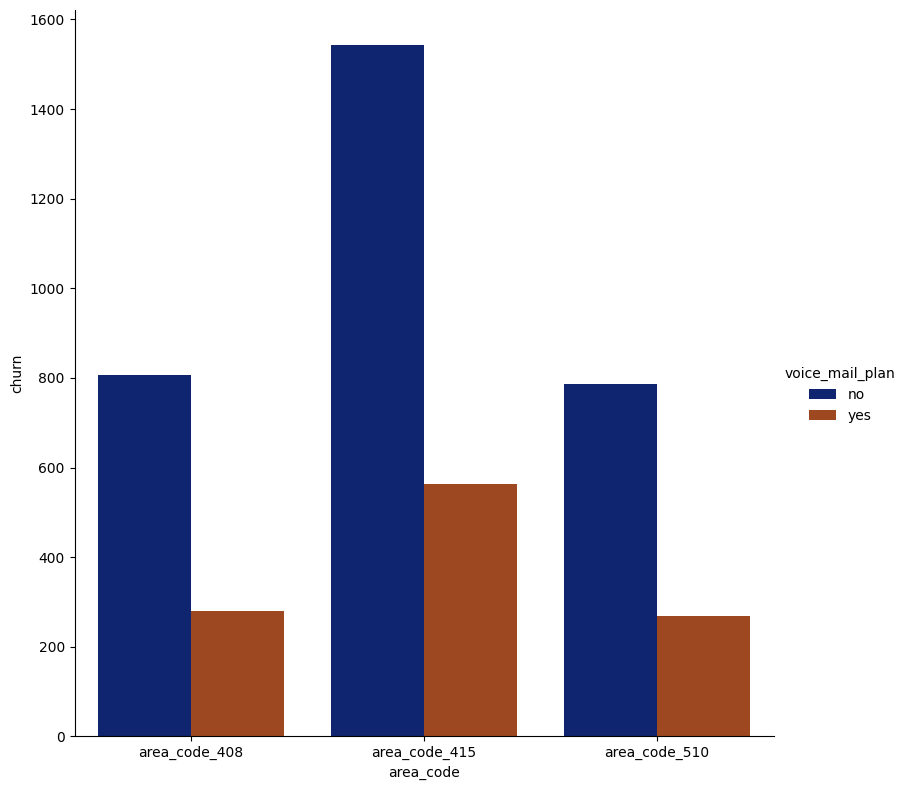

In [22]:
grouped_barchart('voice_mail_plan')



> customers dengan voice mail plan yang melakukan churn paling banyak berada pada area_code_415



<ipython-input-23-b7003d1e6ec6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True)


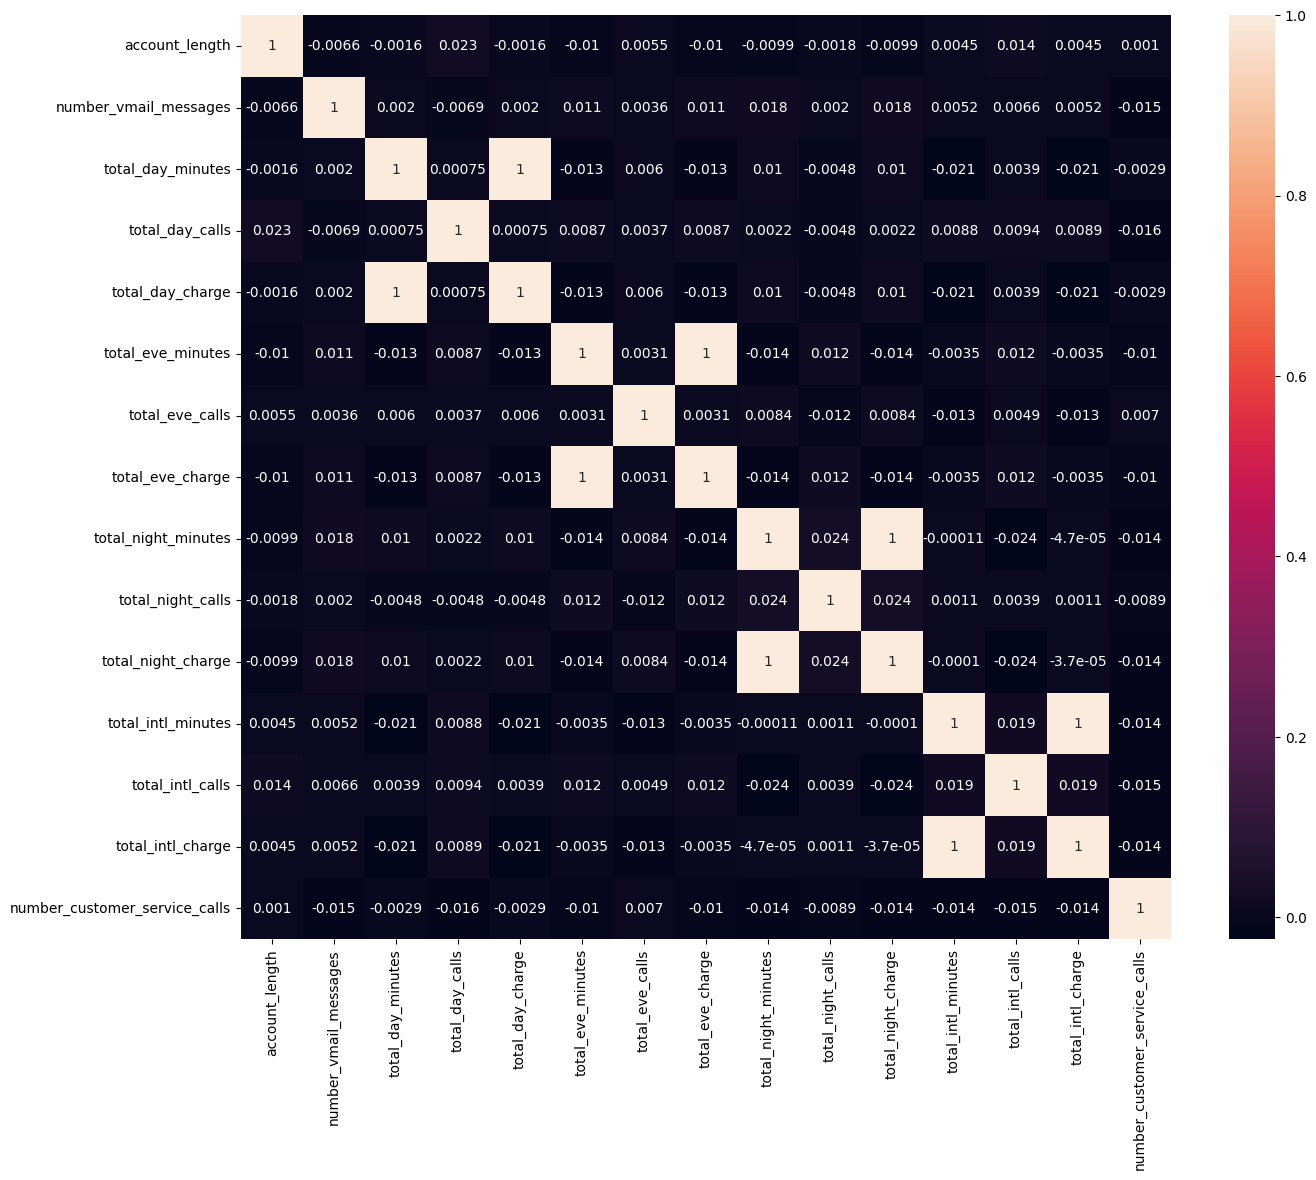

In [23]:
#menampilkan korelasi antar features
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(), annot=True)
plt.show()





> 1. *  Nilai mendekati 0 menunjukkan tidak adanya korelasi linear antara 2 feature
>  *   semakin mendekati 1, semakin memiliki korelasi yang kuat
>  *   semakin mendekati -1, apabila satu feature berkurang, maka fetaure lainnya meningkat



> 2.  Feature yang memiliki korelasi kuat
>  *   Total day charge dengan total day minutes
>  *   Total eve charge dengan total eve minutes
>  *   Total night charge dengan total night minutes
>  *   Total intl charge dengan total intl minutes

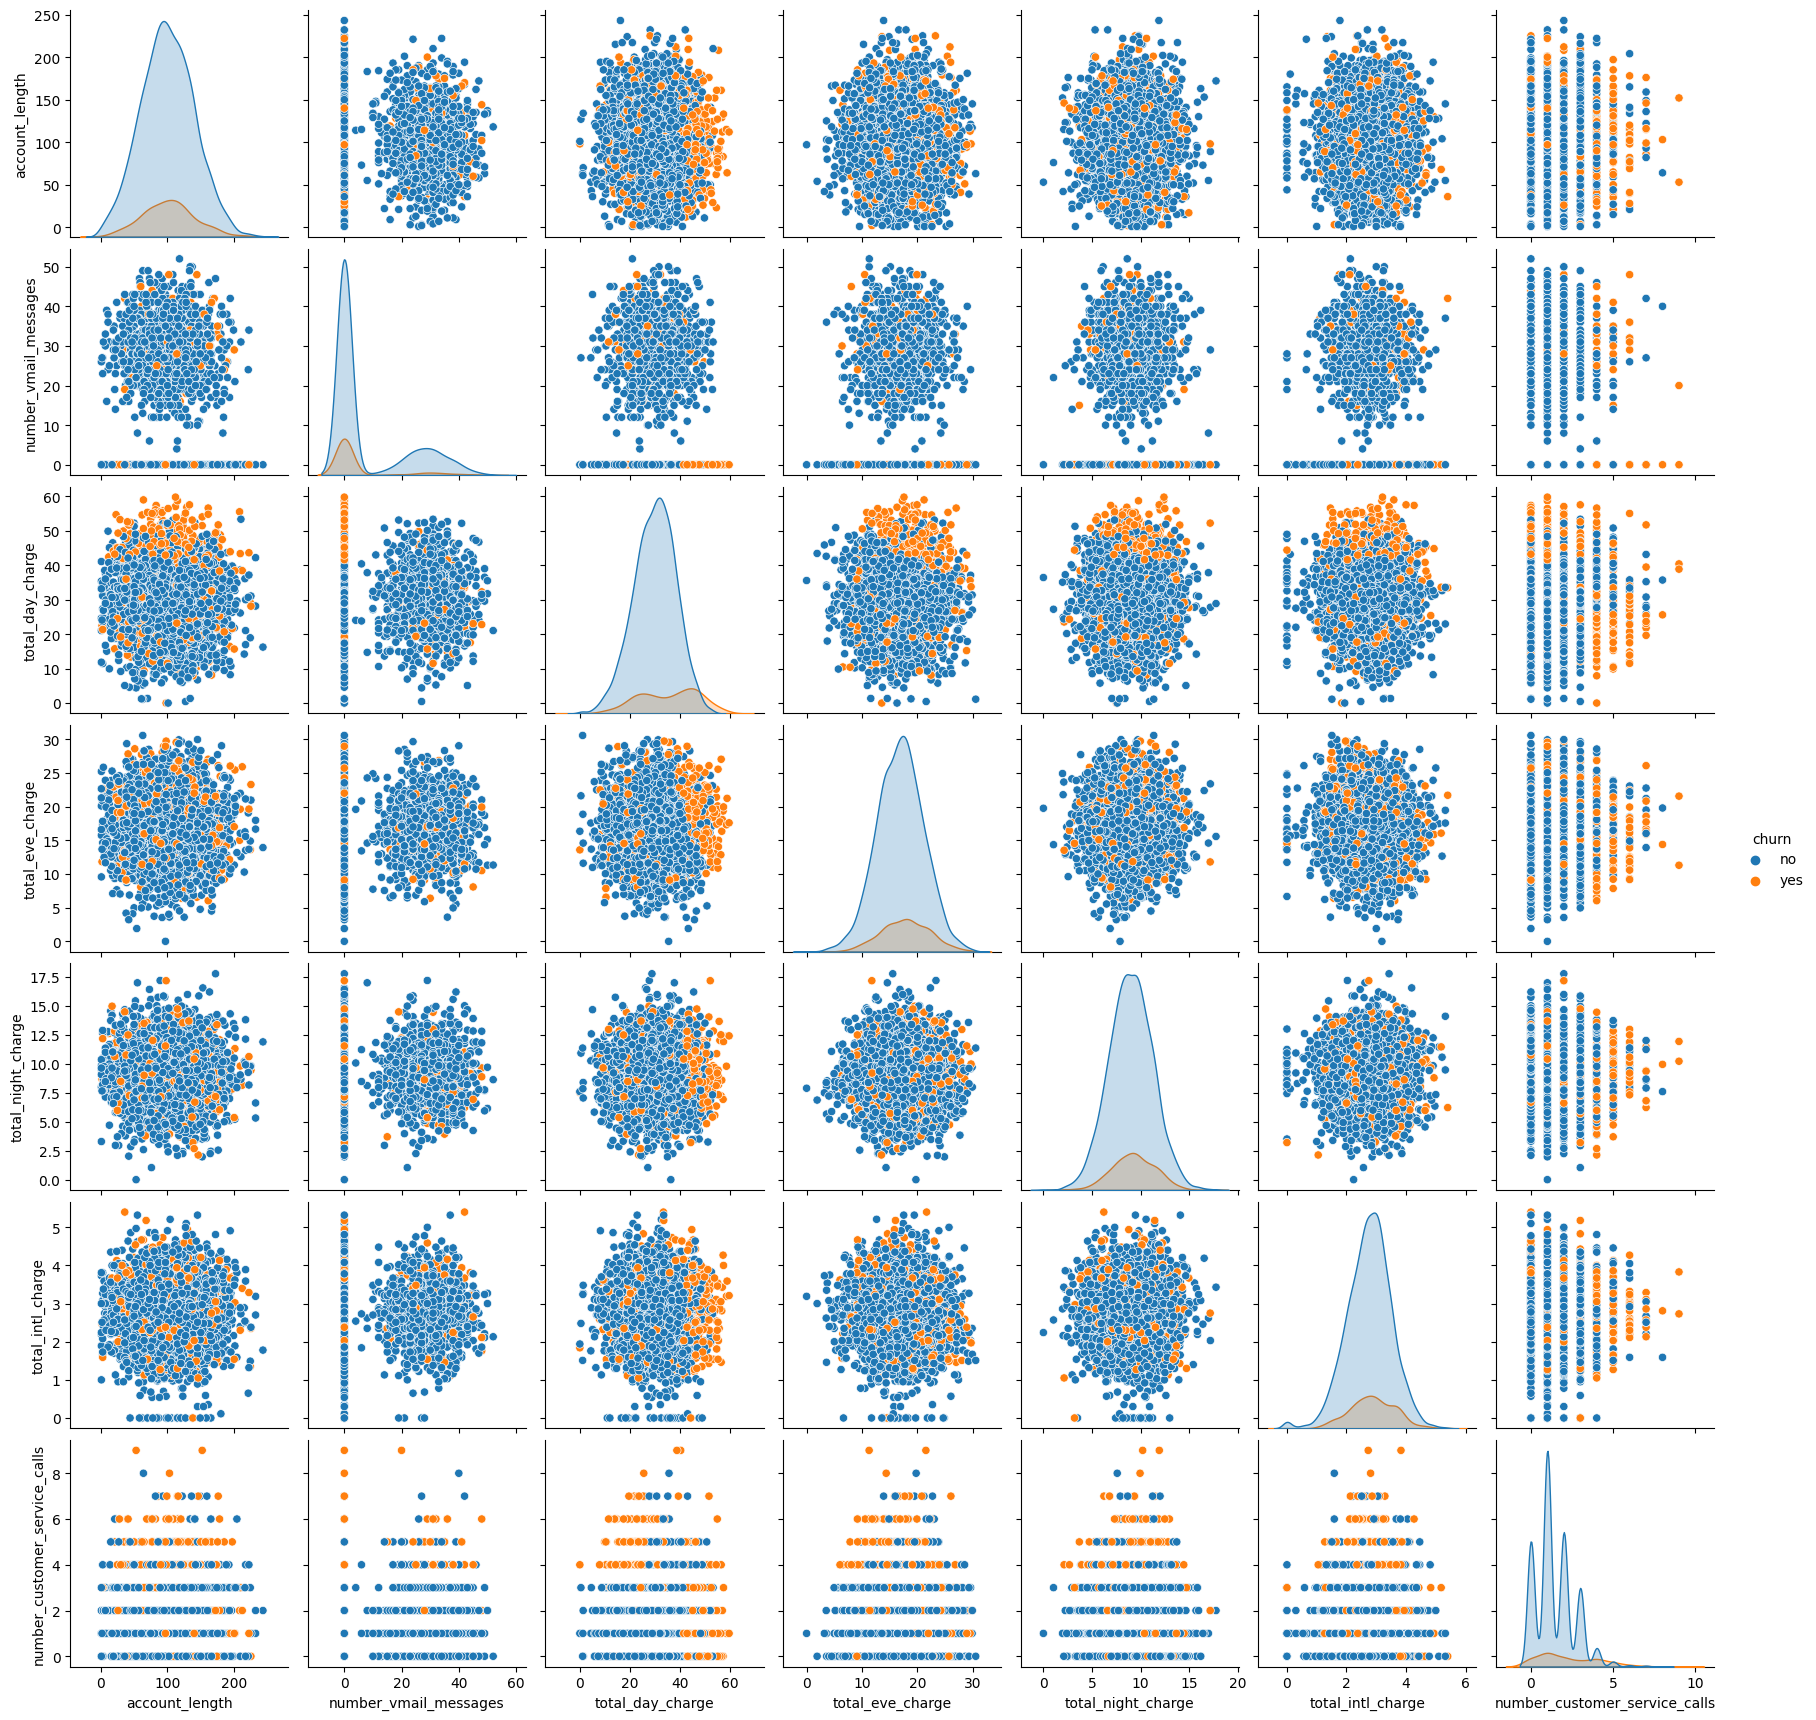

In [24]:
# Melakukan pairplot pada beberapa fitur dalam dataset, dengan memisahkan berdasarkan kelas label churned dan not churned
sns.pairplot(train, vars=['account_length', 'number_vmail_messages', 'total_day_charge',\
                         'total_eve_charge', 'total_night_charge', 'total_intl_charge',\
                         'number_customer_service_calls'], hue='churn')
plt.show()

## 5.) Preprocessing

In [25]:
#Mencari Missing value
train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64



> Tidak terdapat missing value pada data frame 'train'



In [26]:
#mencari duplicated data
train.duplicated().sum()

0



> Tidak ditemukan data yang terduplikasi



In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [28]:
#function normalisasi
def normalisasi(train, kolom):
  for col in numerical:
    train[col] = MinMaxScaler().fit_transform(train[col].values.reshape(len(train), 1))
  return train

In [29]:
#melakukan normalisasi pada data frame train kolom numerical
normalisasi(train, col)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,0.438017,area_code_415,no,yes,0.500000,0.459744,0.745455,0.459672,0.544114,0.605882,0.544204,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,no
1,NJ,0.561983,area_code_415,no,no,0.000000,0.692461,0.690909,0.692436,0.337323,0.647059,0.337263,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,no
2,OH,0.342975,area_code_408,yes,no,0.000000,0.851778,0.430303,0.851740,0.172279,0.517647,0.172233,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,no
3,OK,0.305785,area_code_415,yes,no,0.000000,0.474253,0.684848,0.474230,0.412747,0.717647,0.412901,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,no
4,MA,0.495868,area_code_510,no,yes,0.461538,0.620768,0.533333,0.620649,0.969942,0.635294,0.969876,0.538228,0.674286,0.538548,0.375,0.35,0.375926,0.333333,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,0.338843,area_code_415,no,no,0.000000,0.535704,0.424242,0.535643,0.678542,0.517647,0.678454,0.541013,0.451429,0.541362,0.515,0.30,0.514815,0.000000,no
4246,WV,0.297521,area_code_408,no,no,0.000000,0.506117,0.539394,0.506024,0.365154,0.482353,0.365095,0.471392,0.508571,0.471581,0.575,0.30,0.575926,0.333333,no
4247,NC,0.305785,area_code_408,no,no,0.000000,0.485633,0.612121,0.485609,0.537434,0.741176,0.537328,0.326835,0.594286,0.326956,0.345,0.35,0.344444,0.111111,no
4248,HI,0.202479,area_code_408,no,yes,0.769231,0.670555,0.769697,0.670515,0.620651,0.741176,0.620825,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222,no


In [30]:
def normalisasitest(data_test, kolom):
  for col in numerical:
    data_test[col] = MinMaxScaler().fit_transform(data_test[col].values.reshape(len(data_test), 1))
  return data_test

In [31]:
#Melakukan normalisasi pada dataframe data test dan col numeric
normalisasitest(data_test, col)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,0.535865,area_code_415,no,yes,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,0.618379,0.506410,0.618440,0.529101,0.157895,0.529412,0.166667
1,2,AL,0.493671,area_code_510,yes,no,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,0.488194,0.679487,0.488652,0.333333,0.315789,0.333333,0.000000
2,3,IA,0.257384,area_code_415,no,no,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,0.485322,0.557692,0.485816,0.693122,0.315789,0.694118,0.666667
3,4,VT,0.388186,area_code_510,no,no,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,0.251117,0.698718,0.251064,0.428571,0.157895,0.429412,0.500000
4,5,NE,0.729958,area_code_415,no,no,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,0.637524,0.660256,0.637589,0.820106,0.263158,0.821569,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,0.544304,area_code_415,no,no,0.000000,0.315992,0.483871,0.315945,0.586767,0.472441,0.587049,0.484365,0.634615,0.484397,0.597884,0.368421,0.598039,0.000000
746,747,WA,0.303797,area_code_408,no,no,0.000000,0.486846,0.637097,0.486698,0.719699,0.370079,0.719745,0.609126,0.641026,0.609220,0.650794,0.105263,0.650980,0.500000
747,748,WV,0.637131,area_code_415,no,no,0.000000,0.507538,0.411290,0.507390,0.678496,0.283465,0.678698,0.519145,0.647436,0.519149,0.777778,0.105263,0.778431,0.500000
748,749,DC,0.253165,area_code_415,no,no,0.000000,0.378658,0.403226,0.378543,0.425865,0.716535,0.426044,0.515316,0.544872,0.515603,0.719577,0.210526,0.719608,0.166667


In [32]:
#Melakukan Handling Outliers
print(f'jumlah baris sebelum memfilter outlier: {len(train)}')
filtered_entries = np.array ([True] * len(train))
for col in numerical:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR*1.5)
    high_limit = Q3 + (IQR*1.5)

    filtered_entries = ((train[col] >= low_limit) & (train[col] <= high_limit)) &filtered_entries
train = train[filtered_entries]
print(f'jumlah baris setelah memfilter outlier: {len(train)}')

jumlah baris sebelum memfilter outlier: 4250
jumlah baris setelah memfilter outlier: 3513




> Setelah dilakukan handling outliers, jumlah data yang sebelumnya 4250 baris data menjadi 3513 baris.


In [33]:
#Melakukan Convert data international plan, voice mail plan, dan churn pada dataframe train menjadi tipe numeric
convert = {"no":0, "yes":1}
train['international_plan'] = train['international_plan'].map(convert)
train['voice_mail_plan'] = train['voice_mail_plan'].map(convert)
train['churn'] = train['churn'].map(convert)

<ipython-input-33-4f7d10355a06>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['international_plan'] = train['international_plan'].map(convert)
<ipython-input-33-4f7d10355a06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['voice_mail_plan'] = train['voice_mail_plan'].map(convert)
<ipython-input-33-4f7d10355a06>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [34]:
##Melakukan Convert data international plan, voice mail plan pada dataframe data test menjadi tipe numeric
data_test['international_plan'] = data_test['international_plan'].map(convert)
data_test['voice_mail_plan'] = data_test['voice_mail_plan'].map(convert)

In [35]:
#Menampilkan 5 baris data teratas dari dataframe train setelah dilakukan convert data
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,0.438017,area_code_415,0,1,0.500000,0.459744,0.745455,0.459672,0.544114,0.605882,0.544204,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0
1,NJ,0.561983,area_code_415,0,0,0.000000,0.692461,0.690909,0.692436,0.337323,0.647059,0.337263,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0
3,OK,0.305785,area_code_415,1,0,0.000000,0.474253,0.684848,0.474230,0.412747,0.717647,0.412901,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0
5,MO,0.603306,area_code_415,1,0,0.000000,0.446657,0.478788,0.446620,0.286947,0.552941,0.286837,0.536203,0.548571,0.536297,0.355,0.30,0.355556,0.000000,0
7,WV,0.578512,area_code_415,1,1,0.711538,0.735704,0.509091,0.735609,0.617868,0.652941,0.617878,0.826329,0.554286,0.826674,0.560,0.25,0.559259,0.000000,0


drop column

In [36]:
#Melakukan drop kolom state dan area code pada dataframe train
train= train.drop(['state','area_code'], axis = 1)

In [37]:
#Melakukan drop kolom state dan area code pada dataframe data test
data_test= data_test.drop(['state','area_code'], axis = 1)

In [38]:
#Melakukan drop kolom id pada dataframe data test
data_test= data_test.drop(['id'], axis = 1)

In [39]:
#Menampilkan 5 baris teratas dari dataframe data_test
data_test.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.535865,0,1,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,0.618379,0.506410,0.618440,0.529101,0.157895,0.529412,0.166667
1,0.493671,1,0,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,0.488194,0.679487,0.488652,0.333333,0.315789,0.333333,0.000000
2,0.257384,0,0,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,0.485322,0.557692,0.485816,0.693122,0.315789,0.694118,0.666667
3,0.388186,0,0,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,0.251117,0.698718,0.251064,0.428571,0.157895,0.429412,0.500000
4,0.729958,0,0,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,0.637524,0.660256,0.637589,0.820106,0.263158,0.821569,0.500000


In [40]:
train.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.438017,0,1,0.500000,0.459744,0.745455,0.459672,0.544114,0.605882,0.544204,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0
1,0.561983,0,0,0.000000,0.692461,0.690909,0.692436,0.337323,0.647059,0.337263,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0
3,0.305785,1,0,0.000000,0.474253,0.684848,0.474230,0.412747,0.717647,0.412901,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0
5,0.603306,1,0,0.000000,0.446657,0.478788,0.446620,0.286947,0.552941,0.286837,0.536203,0.548571,0.536297,0.355,0.30,0.355556,0.000000,0
7,0.578512,1,1,0.711538,0.735704,0.509091,0.735609,0.617868,0.652941,0.617878,0.826329,0.554286,0.826674,0.560,0.25,0.559259,0.000000,0


## 6.) Train Test Split

In [41]:
#Memisahkan target variabel dari training features
#features2 pelatihan disimpan dalam variabel x dengan menghapus kolom churn pada dataset train/asli
x = train.drop(['churn'], axis = 1)

#variabel target disimpan dalam kolom y
y = train['churn']

In [42]:
#Memisahkan data menjadi data latih (x_train) dan data uji(x_test)
#dengan perbandingan 70:30 untuk data latih dan data uji

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [43]:
#Menampilkan bentuk dari data latih dan data uji
x_train.shape, x_test.shape

((2459, 17), (1054, 17))



> ada sebanyak 2459 data dengan 17 features data latih dan 1054 data dengan 17 features data uji



In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
#melakukan smote untuk menyeimbangkan dataset
SMOTE = SMOTE()
x_train, y_train = SMOTE.fit_resample(x_train, y_train)

In [47]:
y_train

0       1
1       0
2       0
3       0
4       0
       ..
4405    1
4406    1
4407    1
4408    1
4409    1
Name: churn, Length: 4410, dtype: int64

## 7.) Modelling

### 7.1.) Feature Selection

In [48]:
from sklearn.feature_selection import SelectKBest, chi2

In [49]:
#memilih fitur yang paling relevan
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(x_train, y_train)

vector_names = list(x_train.columns[selector.get_support(indices=True)])
print(vector_names)

['international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_charge', 'total_eve_minutes', 'total_eve_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']




> Fitur yang paling relevan adalah international_plan, voice_mail_plan, number_vmail_messanges, total_day_minutes, total_day_charge, total_eve_minutes, total_eve_charge, total_intl_minutes, total_intl_calls, total_intl_charge



In [50]:
x_train = x_train[vector_names]
x_test = x_test[vector_names]

In [51]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   international_plan     4410 non-null   int64  
 1   voice_mail_plan        4410 non-null   int64  
 2   number_vmail_messages  4410 non-null   float64
 3   total_day_minutes      4410 non-null   float64
 4   total_day_charge       4410 non-null   float64
 5   total_eve_minutes      4410 non-null   float64
 6   total_eve_charge       4410 non-null   float64
 7   total_intl_minutes     4410 non-null   float64
 8   total_intl_calls       4410 non-null   float64
 9   total_intl_charge      4410 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 344.7 KB


In [52]:
x_train.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,total_intl_minutes,total_intl_calls,total_intl_charge
0,0,0,0.000000,0.792034,0.792001,0.701920,0.702030,0.685,0.05,0.685185
1,0,0,0.000000,0.458037,0.457999,0.578903,0.578913,0.420,0.20,0.420370
2,0,1,0.692308,0.472831,0.472724,0.664626,0.664702,0.560,0.10,0.559259
3,0,0,0.000000,0.452063,0.451975,0.675758,0.675835,0.325,0.20,0.325926
4,0,1,0.538462,0.787198,0.787149,0.566936,0.566798,0.415,0.15,0.414815


### 7.2.) Modelling

In [53]:
#Membuat model logistic regression
model = LogisticRegression()
model.fit(x_train, y_train)
result = model.score(x_test, y_test)

In [62]:
#membuat model decision tree
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
clf = clf.fit(x_train, y_train)

plt.show()

### 7.3.) Evaluasi Model

In [55]:
#akurasi model logistic regression
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 82.068%




> Akurasi Model Logistic Regression sebesar 82.068%



In [56]:
#akurasi model decision tree
print("Accuracy: %.3f%%" % (clf.score(x_test, y_test)*100.0))

Accuracy: 90.038%




> Akurasi model decision tree classifier sebesar 90.038%



### 7.4.) model validation

In [57]:
#validasi model LogisticRegression
kfold = model_selection.KFold(n_splits=5,shuffle = True, random_state=123)
model = LogisticRegression()
results = model_selection.cross_val_score(model, x, y, cv=kfold,scoring='accuracy')

In [58]:
#Akurasi model LogisticRegression setelah validasi model
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 90.749% (0.915%)




> Akurasi model logistic regression setelah divalidasi sebanyak 5 kali iterasi adalah 90.749%



In [59]:
#model validation DecisionTree
k_fold = KFold(n_splits=5 , shuffle=True, random_state=0)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)

In [60]:
#Akurasi model DecisionTree setelah validasi 
print("Accuracy: %.3f%% (%.3f%%)" % (score.mean()*100.0, results.std()*100.0))

Accuracy: 92.201% (0.915%)




> Akurasi model Decision Tree setelah divalidasi sebanyak 5 kali iterasi adalah 92.201%



## 8.) Prediction

In [63]:
#melakukan prediksi menggunakan model decision tree
y_predict = clf.predict(x_test)
churn_predict_decisiontree = pd.Series(list(y_predict))
churn_predict_decisiontree .value_counts()

0    904
1    150
dtype: int64



> Prediksi pada dataframe data test adalah 150 costumers melakukan churn



In [64]:
prediksi = {'prediksi decision tree' : churn_predict_decisiontree}
prediksi = pd.DataFrame(prediksi)

In [65]:
#menampilan 5 data teratas hasil prediksi
prediksi.head()

,prediksi decision tree
0,1
1,0
2,0
3,0
4,0




> 1 merupakan churn dan 0 merupakan tidak churn



Text(0.5, 0, 'Churn')

<Figure size 640x480 with 0 Axes>

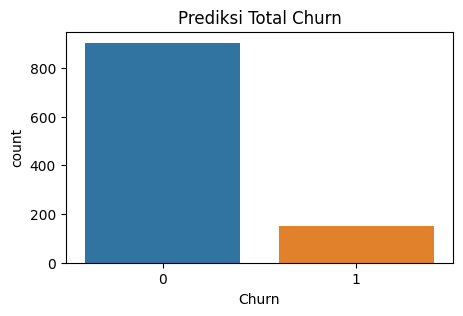

In [66]:
#membuat visualisasi prediksi customers churn
plt.clf()
plt.figure(figsize=(5,3))
sns.countplot(x=churn_predict_decisiontree)
plt.title('Prediksi Total Churn')
plt.xlabel('Churn')




> Prediksi churn pada dataframe data test tidak lebih dari 200 costumers

